"Logistic Regression model for Wildlife conservation | species classification (bird or not bird)"

In [2]:
#purnima rangavajjula
#S5 CSE A
#AM.EN.U4CSE21046

 Logistic regression is a powerful statistical method used for binary classification problems, predicting outcomes as either 0 or 1.

 Logistic regression models the probability of an event occurring, offering insights into the likelihood of a particular outcome.

 The logistic function, also known as the sigmoid function, is a key component of logistic regression.

 It utilizes the logistic function to model the probability of a certain event occurring, providing a smooth S-shaped curve.

 Logistic regression is computationally efficient, less prone to overfitting, and provides probabilistic predictions, making it a versatile and interpretable tool in predictive modeling.

 Linear Combination:

 z=b0+b1x1+b2x2+....+bkxk
 bo,b1,b2...bk- coefficients of predictor variables x1,x2,x3...xk

 Log-odds transformation:
 The log-odds is calculated using the natural logarithm of the odds ratio, where p is the probability of the event (Y=1).

 logit-ln(p/1-p)=z

 Sigmoid function:
 The logistic (sigmoid) function transforms the log-odds into a probability between 0 and 1.

 p(Y=1)=1/1+e^-z
 p(Y=0)=1-p(Y=1)


The logistic (sigmoid) function transforms the log-odds into a probability between 0 and 1. The equation includes the exponential function



Import Necessary Libraries

In [3]:
import librosa as ls
import pandas as pd #data wrangling and data manipulation '2D' Heterogenous objects
import numpy as np #arrays and matrices 'ND' Homogenous objects
import seaborn as sns #Matplot library for plotting, graphics...
import matplotlib.pyplot as plt #Data visualisation
from sklearn.model_selection import train_test_split #from scikit learn-importing Train-Test-split
from sklearn.linear_model import LogisticRegression #Logistic Regression model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # For calculating respective accuracy, confusion matrix, classification report
import librosa.display
import os
from sklearn.neighbors import KNeighborsClassifier
import json
import ast
import re
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import joblib
import pickle

Load the dataset and Explore

In [4]:
df = pd.read_csv(r"/content/fd3.csv")
df.head()

,File_ID,Filename,Spectral_Centroid,Spectral_Bandwidth,Spectral_Contrast,Spectral_Rolloff,Chroma,Spectral_Flatness,Zero_Crossing_Rate,HNR,species
0,0,XC100213.mp3,4116.189458,2193.760985,20.003973,5991.788678,0.369853,0.060670,0.346447,2.501654e-07,Bird
1,1,XC100251.mp3,4261.538777,2846.498340,19.124991,7534.970936,0.559703,0.146034,0.337061,8.686239e-08,Bird
2,2,XC100479.mp3,6060.823275,2119.443755,25.646550,8289.603882,0.450026,0.027006,0.543093,2.150358e-10,Bird
3,3,XC100600.mp3,4580.187914,1965.629338,19.168746,6364.989870,0.368529,0.113970,0.388023,1.353291e-06,Bird
4,4,XC102946.mp3,4474.772868,2111.824018,22.203047,6641.680458,0.349839,0.060978,0.353554,-3.745034e-07,Bird


Splitting the data into Train-Test

In [5]:
#Features(X):'Spectral_Centroid', 'Spectral_Bandwidth', 'Spectral_Contrast', 'Spectral_Rolloff', 'Chroma',
#'Spectral_Flatness', 'Zero_Crossing_Rate', and 'HNR'.

#Target (y):'species'

In [6]:
'''The train_test_split function from scikit-learn is used to split the dataset into training and testing sets.
test_size=0.2 indicates that 20% of the data will be used for testing, and the remaining 80% for training.
stratify=y ensures that the class distribution is maintained in both the training and testing sets.
random_state=42 sets a seed for reproducibility.'''

'''X_train and y_train represent the feature and target variables of the training set,
 while X_test and y_test represent the feature and target variables of the testing set. '''

'X_train and y_train represent the feature and target variables of the training set,\n while X_test and y_test represent the feature and target variables of the testing set. '

In [7]:
X = df[[ 'Spectral_Centroid','Spectral_Bandwidth',
        'Spectral_Contrast', 'Spectral_Rolloff',
        'Chroma','Spectral_Flatness',
         'Zero_Crossing_Rate', 'HNR' ]]
y = df['species']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(f"Number of samples in the training set: {len(X_train)}")
print(f"Number of samples in the testing set: {len(X_test)}")


Number of samples in the training set: 3784
Number of samples in the testing set: 946


Training the model

In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
'''In logistic regression, accuracy is a commonly used metric to evaluate the performance of the model.
It represents the ratio of correctly predicted instances to the total number of instances in the dataset. '''

'In logistic regression, accuracy is a commonly used metric to evaluate the performance of the model.\nIt represents the ratio of correctly predicted instances to the total number of instances in the dataset. '

Training Accuracy

In [11]:
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy}')


Training Accuracy: 0.8369450317124736


Testing Accuracy

In [12]:
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy}')


Testing Accuracy: 0.8276955602536998


A confusion matrix is a table that is often used to describe the performance of a classification model on a set of data for which the true values are known. It allows you to understand the performance of the model by breaking down the number of true positives, true negatives, false positives, and false negatives.

True Positive (TP): The number of instances correctly predicted as positive (correctly predicted instances of the positive class).

True Negative (TN): The number of instances correctly predicted as negative (correctly predicted instances of the negative class).

False Positive (FP): The number of instances incorrectly predicted as positive (instances actually belonging to the negative class but predicted as positive).

False Negative (FN): The number of instances incorrectly predicted as negative (instances actually belonging to the positive class but predicted as negative).

Confusion Matrix:
[[468  78]
 [ 85 315]]


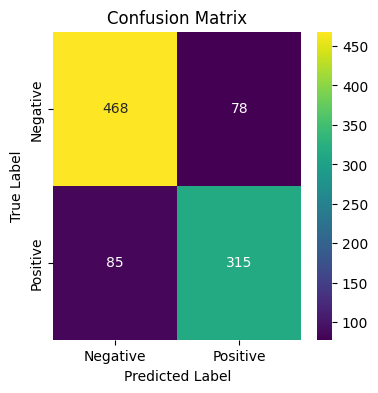

In [13]:
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [14]:
report = classification_report(y_test, y_test_pred)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

        Bird       0.85      0.86      0.85       546
    Not-Bird       0.80      0.79      0.79       400

    accuracy                           0.83       946
   macro avg       0.82      0.82      0.82       946
weighted avg       0.83      0.83      0.83       946



In [ ]:
'''END'''

'END'